# 1. Import Packages and prepare the data
> Carefully make sure you `data_dir` can get the right RESP and HEA data!

In [4]:
%pip install wfdb
%pip install numba
%pip install xlrd 
%pip install os 

import numba
import os
import numpy as np
import matplotlib.pyplot as plt
import wfdb # read Physionet/picsdb file format
import xlrd
from scipy.signal import welch, butter, filtfilt
from wfdb import processing
from numba import jit

data_dir = "C:\\Users\\18071\\Desktop\\123"


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Check Data list
# Initial Inspect
L = os.listdir(data_dir)
for l in L:
    print(l)

123
ANNOTATORS
infant10_ecg.atr
infant10_ecg.dat
infant10_ecg.hea
infant10_ecg.qrsc
infant10_resp.dat
infant10_resp.hea
infant10_resp.resp
infant1_ecg.atr
infant1_ecg.dat
infant1_ecg.hea
infant1_ecg.qrsc
infant1_resp.dat
infant1_resp.hea
infant1_resp.resp
infant2_ecg.atr
infant2_ecg.dat
infant2_ecg.hea
infant2_ecg.qrsc
infant2_resp.dat
infant2_resp.hea
infant2_resp.resp
infant3_ecg.atr
infant3_ecg.dat
infant3_ecg.hea
infant3_ecg.qrsc
infant3_resp.dat
infant3_resp.hea
infant3_resp.resp
infant4_ecg.atr
infant4_ecg.dat
infant4_ecg.hea
infant4_ecg.qrsc
infant4_resp.dat
infant4_resp.hea
infant4_resp.resp
infant5_ecg.atr
infant5_ecg.dat
infant5_ecg.hea
infant5_ecg.qrsc
infant5_resp.dat
infant5_resp.hea
infant5_resp.resp
infant6_ecg.atr
infant6_ecg.dat
infant6_ecg.hea
infant6_ecg.qrsc
infant6_resp.dat
infant6_resp.hea
infant6_resp.resp
infant7_ecg.atr
infant7_ecg.dat
infant7_ecg.hea
infant7_ecg.qrsc
infant7_resp.dat
infant7_resp.hea
infant7_resp.resp
infant8_ecg.atr
infant8_ecg.dat
infant8_ec

In [8]:
# load_wafeforms function preparation
def load_waveforms(data_dir, infant_index, verbose=True):
    """
    load ECG/RESP waveforms, return as arrays, return sampling freqs
    """
    file_ecg = f"infant{infant_index:d}_ecg"
    file_resp = f"infant{infant_index:d}_resp"
    record_ecg = wfdb.rdrecord(os.path.join(data_dir, file_ecg))
    record_resp = wfdb.rdrecord(os.path.join(data_dir, file_resp))
    d_ecg = record_ecg.__dict__
    d_resp = record_resp.__dict__
    fs_ecg = d_ecg['fs']  # ECG sampling rate in Hz
    fs_resp = d_resp['fs']  # RESP sampling rate in Hz
    x_ecg = d_ecg['p_signal'].ravel()
    x_resp = d_resp['p_signal'].ravel()
    if verbose:
        print("Loading ECG file: ", file_ecg)
        print("Loading RESP file: ", file_resp)
        #print("ECG record: ", d_ecg['record_name'])
        #print("number of signals: ", d_ecg['n_sig'])
        #print("sampling frequency: ", d_ecg['fs'], "Hz")
        #print("Number of samples: ", d_ecg['sig_len'])
        #print("Signal name: ", d_ecg['sig_name'])
        #print("RESP record: ", d_resp['record_name'])
        #print("number of signals: ", d_resp['n_sig'])
        #print("sampling frequency: ", d_resp['fs'], "Hz")
        #print("Number of samples: ", d_resp['sig_len'])
        #print("Signal name: ", d_resp['sig_name'])
        print("ECG sampling frequency: ", fs_ecg, " Hz")
        print("RESP sampling frequency: ", fs_resp, " Hz")
    return x_ecg, x_resp, fs_ecg, fs_resp

In [9]:
# Data Import
file_index = 1 # 1...10, loads data from infant1 ... infant10
segment_index = 0 # 0,...
# # x_ecg_full, x_resp_full, fs_ecg, fs_resp = load_waveforms(data_dir, file_index)
# # dt_ecg = 1/fs_ecg # ECG sampling interval in sec.
# # dt_resp = 1/fs_resp # RESP sampling interval in sec.
# print("ECG sampling interval dt = ", dt_ecg, " sec.")
# print("RESP sampling interval dt = ", dt_resp, " sec.")

# 2. Show data

## RESP 

Text(0.5, 0.98, 'First 250ms subsample of RESP signals form')

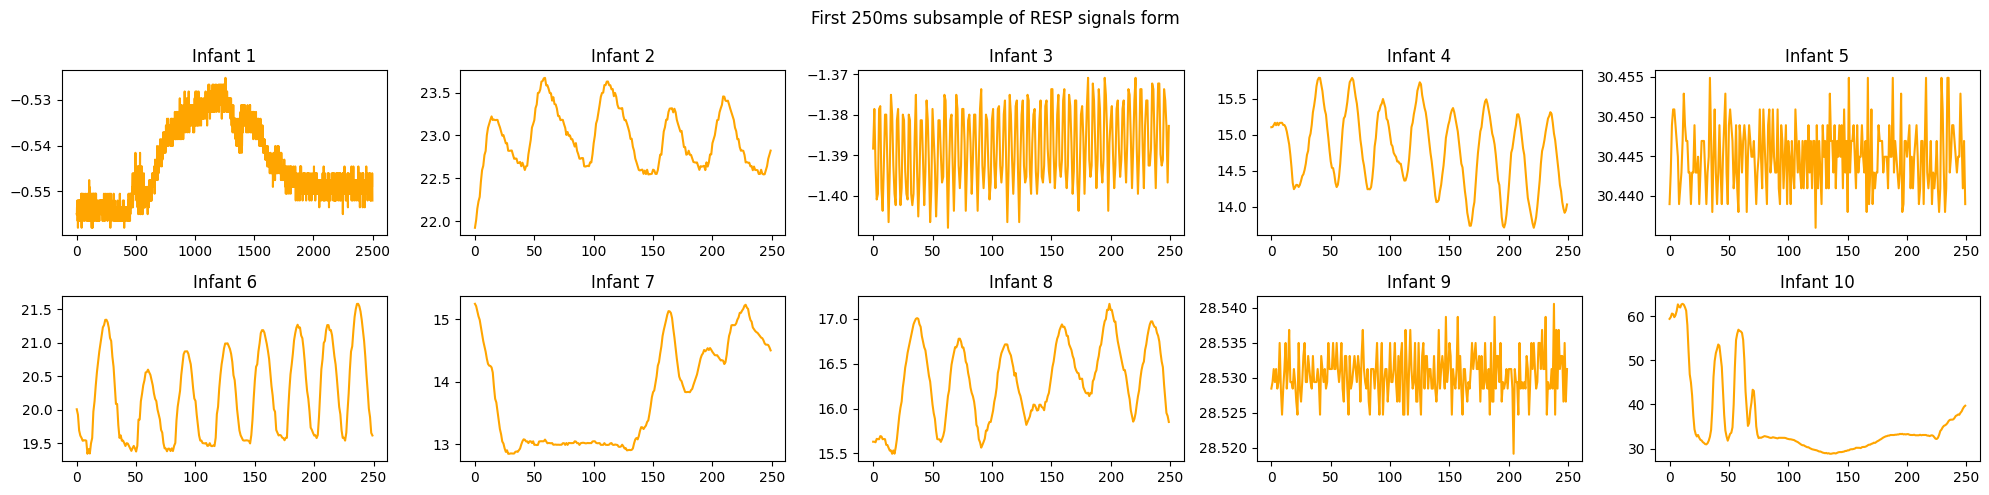

In [10]:

resp_records = []  # reso records list
resp_subsample_duration = 250  # unit: millionseconds
# RESP PLOT
fig, axs = plt.subplots(2, 5, figsize=(20, 5))
fig.set_tight_layout(True)
for i in range(1, 11):
    ax = axs.flat[i-1]
    if i == 1:
      resp_subsample_duration = 2500
    else:
      resp_subsample_duration = 250
    ax.plot(wfdb.rdsamp(f"{data_dir}/infant{i}_resp")[0][:resp_subsample_duration], color='orange')
    ax.set_title(f'Infant {i}')
    #ax.set_xlabel('time(ms)')
    #ax.set_ylabel('freq(hz)')
fig.suptitle(f"First {resp_subsample_duration}ms subsample of RESP signals form")


## ECG

Text(0.5, 0.98, 'First 2500ms subsample of RESP signals form')

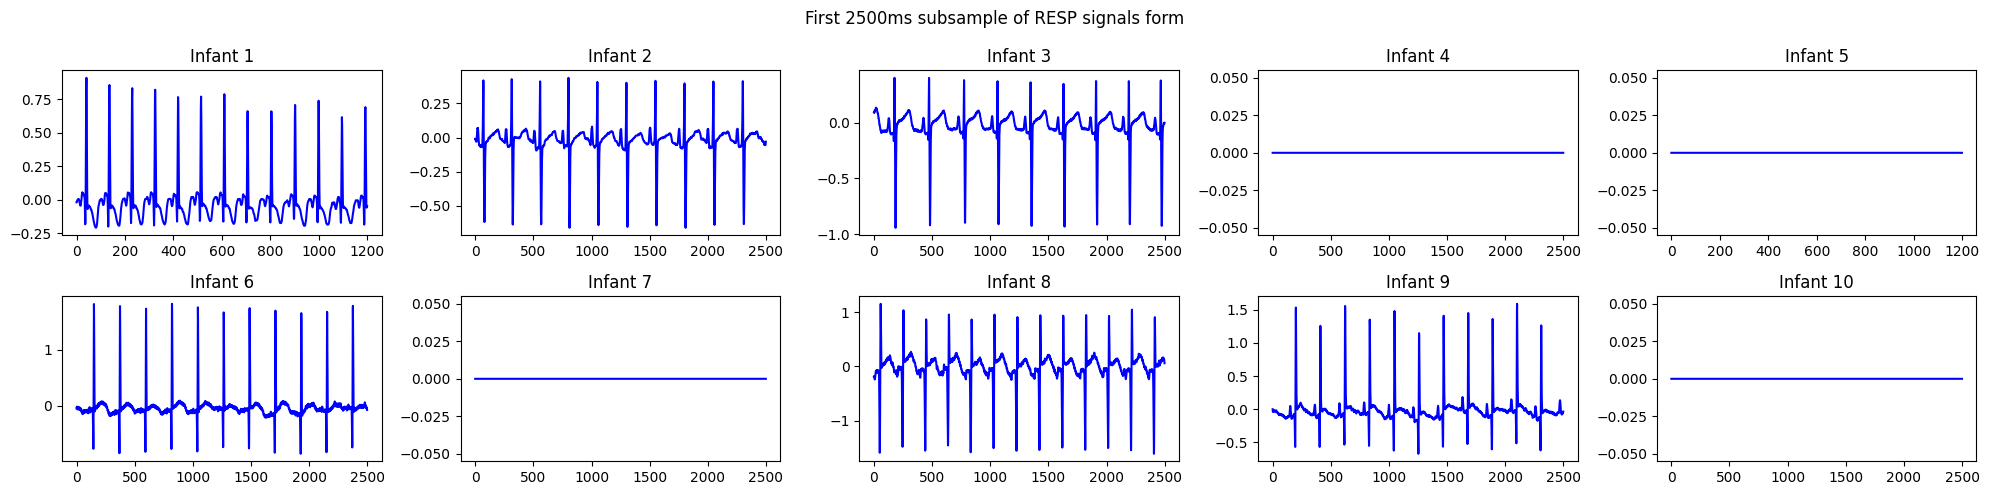

In [15]:
 # ECG PLOT
ecg_records = [] # ecg records list
ecg_subsample_duration = 500
fig, axs = plt.subplots(2, 5, figsize=(20,5))
fig.set_tight_layout(True)
for i in range(1, 11):
  ax = axs.flat[i-1]
  if i == 1 or i == 5:
    ecg_subsample_duration = 1200
  else:
    ecg_subsample_duration = 2500
  ax.plot(wfdb.rdsamp(f"{data_dir}/infant{i}_ecg")[0][:ecg_subsample_duration], color='blue')
  ax.set_title(f'Infant {i}')
  #ax.set_xlabel('time(ms)')
  #ax.set_ylabel('freq(hz)')
fig.suptitle(f"First {ecg_subsample_duration}ms subsample of RESP signals form")


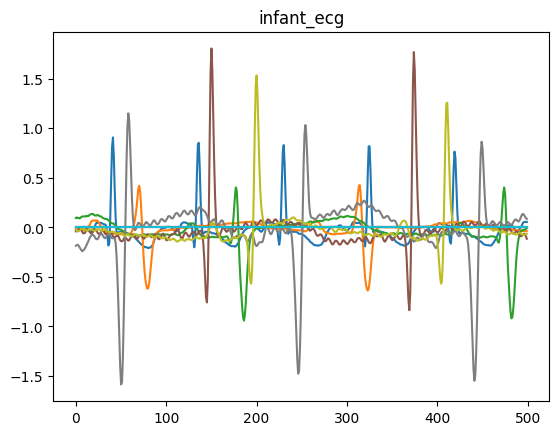

In [28]:
#All ecg signals on one canvas
plt.figure(1)
ecg_records = []
for i in range(1,11):
  ecg_record = wfdb.rdsamp(f"{data_dir}/infant{i}_ecg")
  plt.subplot(1,1,1)
  plt.plot(ecg_record [0][:500])
  plt.title("infant_ecg")

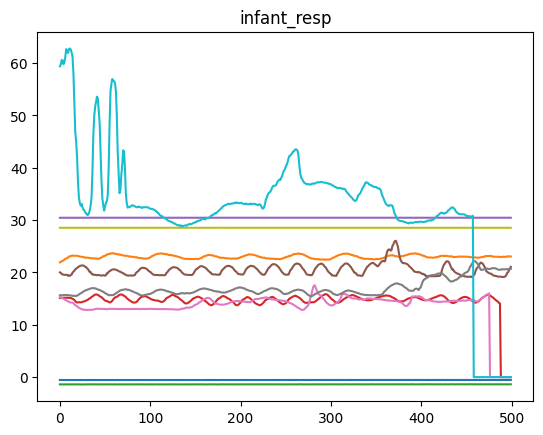

In [29]:
#All resp signals on one canvas
plt.figure(1)
ecg_records = []
for i in range(1,11):
  ecg_record = wfdb.rdsamp(f"{data_dir}/infant{i}_resp")
  plt.subplot(1,1,1)
  plt.plot(ecg_record [0][:500])
  plt.title("infant_resp")